In [1]:
import pandas as pd
pd.set_option('display.max_columns', 500)
pd.set_option('display.max_rows', 500)
# Import all lib to run benchmark function

**Chargement du jeu de données**

In [84]:
# Run the notebook below to use needed function
%run Pelec2A_BenchmarkFunction.ipynb

In [3]:
# Import datas from Exploration Notebook
%store -r df_to_benchmark

In [4]:
x = df_to_benchmark.iloc[:, :-2].astype('float64')

In [5]:
x.iloc[:, :4] = x.iloc[:, :4].apply(np.absolute).apply(np.sqrt)

In [6]:
y_Cons = df_to_benchmark.iloc[:, -1]
y_GHG = df_to_benchmark.iloc[:, -2]

**Benchmark des modèles réalisés**

**Greenhouse Gases**

In [86]:
%run Pelec2A_BenchmarkFunction.ipynb

GHG_models = list([
    dum(),
    lin_reg(),
    lasso([0.01]),
    ela_net([0.001], [0.001]),
    ridge([0.9], ['auto']),
    ran_for([400], [12], ['auto'], [2], [25]),
    svr([4], [0.1]),
    grad_boo([400], [3], ['auto']),
    xg_boo([800], [5], [1.4], ['gbtree']),
    ridge_kern([0.0001], [0.0001], ['rbf']),

])

In [87]:
result_ghg_none = model_benchmark(x, y_GHG, None, GHG_models)

result_ghg_none['perf'].round(2)

dummy is trained and fitted in 0.064 sec
{'mean_fit_time': array([0.00366693]), 'std_fit_time': array([0.00434063]), 'mean_score_time': array([0.00245631]), 'std_score_time': array([0.00443733]), 'param_dummy__strategy': masked_array(data=['mean'],
             mask=[False],
       fill_value='?',
            dtype=object), 'params': [{'dummy__strategy': 'mean'}], 'split0_test_score': array([-284.79615366]), 'split1_test_score': array([-216.61382153]), 'split2_test_score': array([-285.83798947]), 'split3_test_score': array([-1128.09094158]), 'split4_test_score': array([-220.4178112]), 'split5_test_score': array([-305.04960976]), 'split6_test_score': array([-663.2413702]), 'split7_test_score': array([-359.41525004]), 'split8_test_score': array([-162.43495428]), 'split9_test_score': array([-165.17017575]), 'mean_test_score': array([-379.10680775]), 'std_test_score': array([284.51313205]), 'rank_test_score': array([1])}
linear_regression is trained and fitted in 0.068 sec
{'mean_fit_time'

svr is trained and fitted in 1.433 sec
{'mean_fit_time': array([0.12408385]), 'std_fit_time': array([0.0118867]), 'mean_score_time': array([0.00480323]), 'std_score_time': array([0.00708291]), 'param_svr__C': masked_array(data=[4],
             mask=[False],
       fill_value='?',
            dtype=object), 'param_svr__fit_intercept': masked_array(data=[True],
             mask=[False],
       fill_value='?',
            dtype=object), 'param_svr__loss': masked_array(data=['squared_epsilon_insensitive'],
             mask=[False],
       fill_value='?',
            dtype=object), 'param_svr__max_iter': masked_array(data=[100000],
             mask=[False],
       fill_value='?',
            dtype=object), 'param_svr__tol': masked_array(data=[0.1],
             mask=[False],
       fill_value='?',
            dtype=object), 'params': [{'svr__C': 4, 'svr__fit_intercept': True, 'svr__loss': 'squared_epsilon_insensitive', 'svr__max_iter': 100000, 'svr__tol': 0.1}], 'split0_test_score': arr

,ridge_kernel,xgboost,gradient_boosting,svr,random_forest,ridge,elastic,lasso,linear_regression,dummy
Train RMSE,290.84,395.06,338.50,446.99,318.35,328.27,328.26,328.38,4.334460e+13,379.11
Test RMSE,296.55,287.80,278.75,361.02,401.35,408.04,408.07,407.90,4.079300e+02,678.39
R²,0.81,0.82,0.83,0.72,0.65,0.64,0.64,0.64,6.400000e-01,-0.00
Time,0.52,2.78,5.99,1.43,14.76,0.13,2.69,2.02,7.000000e-02,0.06


In [15]:
GHG_models_lasso = list([
    dum(),
    lin_reg(),
    lasso([0.01]),
    ela_net([0.001], [0.001]),
    ridge([0.9], ['auto']),
    ran_for([400], [12], ['auto'], [2], [25]),
    svr([2], [0.1]),
    grad_boo([600], [4], ['sqrt']),
    xg_boo([800], [4], [1.0], ['gbtree']),
    ridge_kern([0.007], [0.01], ['rbf'])
])

result_ghg_lasso = model_benchmark(x, y_GHG, 'lasso', GHG_models_lasso)

result_ghg_lasso['perf'].round(2)

C:\Users\DrDjekyl\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:529: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 7700546.427407004, tolerance: 18231.645304960002
  model = cd_fast.enet_coordinate_descent(


dummy is trained and fitted in 1.450 sec


C:\Users\DrDjekyl\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:529: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 7700546.427407004, tolerance: 18231.645304960002
  model = cd_fast.enet_coordinate_descent(


linear_regression is trained and fitted in 1.549 sec


C:\Users\DrDjekyl\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:529: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 7700546.427407004, tolerance: 18231.645304960002
  model = cd_fast.enet_coordinate_descent(
C:\Users\DrDjekyl\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:529: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 7700546.427407004, tolerance: 18231.645304960002
  model = cd_fast.enet_coordinate_descent(


lasso is trained and fitted in 3.029 sec


C:\Users\DrDjekyl\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:529: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 7700546.427407004, tolerance: 18231.645304960002
  model = cd_fast.enet_coordinate_descent(
C:\Users\DrDjekyl\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:529: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 7700546.427407004, tolerance: 18231.645304960002
  model = cd_fast.enet_coordinate_descent(


elastic is trained and fitted in 3.176 sec


C:\Users\DrDjekyl\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:529: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 7700546.427407004, tolerance: 18231.645304960002
  model = cd_fast.enet_coordinate_descent(
C:\Users\DrDjekyl\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:529: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 7700546.427407004, tolerance: 18231.645304960002
  model = cd_fast.enet_coordinate_descent(


ridge is trained and fitted in 3.875 sec


C:\Users\DrDjekyl\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:529: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 7700546.427407004, tolerance: 18231.645304960002
  model = cd_fast.enet_coordinate_descent(


random_forest is trained and fitted in 8.832 sec


C:\Users\DrDjekyl\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:529: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 7700546.427407004, tolerance: 18231.645304960002
  model = cd_fast.enet_coordinate_descent(


svr is trained and fitted in 2.355 sec


C:\Users\DrDjekyl\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:529: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 7700546.427407004, tolerance: 18231.645304960002
  model = cd_fast.enet_coordinate_descent(


gradient_boosting is trained and fitted in 4.173 sec


C:\Users\DrDjekyl\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:529: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 7700546.427407004, tolerance: 18231.645304960002
  model = cd_fast.enet_coordinate_descent(


xgboost is trained and fitted in 4.580 sec


C:\Users\DrDjekyl\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:529: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 7700546.427407004, tolerance: 18231.645304960002
  model = cd_fast.enet_coordinate_descent(


ridge_kernel is trained and fitted in 2.327 sec


,ridge_kernel,xgboost,gradient_boosting,svr,random_forest,ridge,elastic,lasso,linear_regression,dummy
Train RMSE,330.11,458.68,358.84,426.07,329.97,336.42,336.42,336.51,4.311808e+13,408.16
Test RMSE,238.46,273.27,317.01,363.07,405.42,408.77,408.80,408.64,4.086300e+02,678.39
R²,0.88,0.84,0.78,0.71,0.64,0.64,0.64,0.64,6.400000e-01,-0.00
Time,2.33,4.58,4.17,2.36,8.83,3.87,3.18,3.03,1.550000e+00,1.45


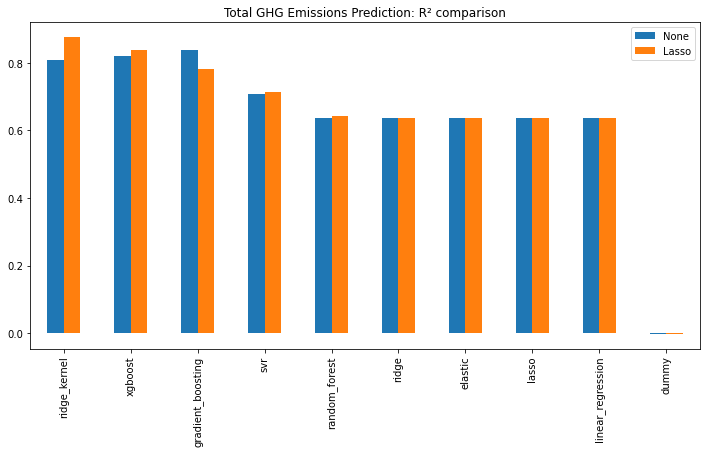

In [16]:
ghg = pd.concat([
    result_ghg_none['perf'],
    result_ghg_lasso['perf']
])

title = 'Total GHG Emissions Prediction: R² comparison'
ax = ghg.iloc[[2, 6], :].T.plot.bar(figsize=(12, 6), title=title)
ax.legend(['None', 'Lasso']);

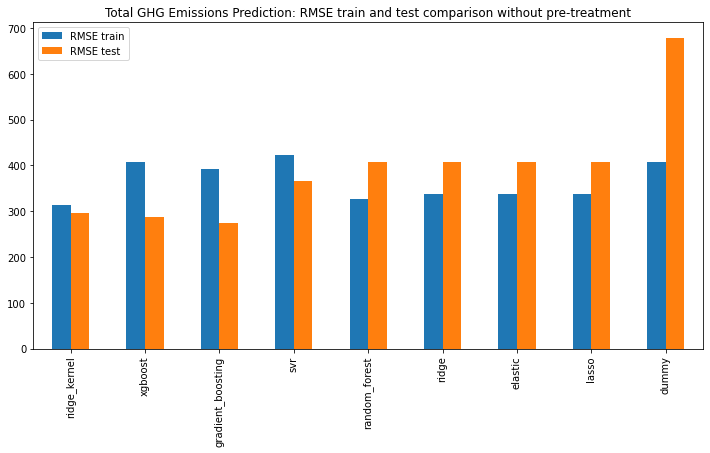

In [17]:
ghg.drop(columns='linear_regression', inplace=True)

title = 'Total GHG Emissions Prediction: RMSE train and test comparison without pre-treatment'
ax = ghg.iloc[[0, 1], :].T.plot.bar(figsize=(12, 6), title=title)
ax.legend(['RMSE train', 'RMSE test']);

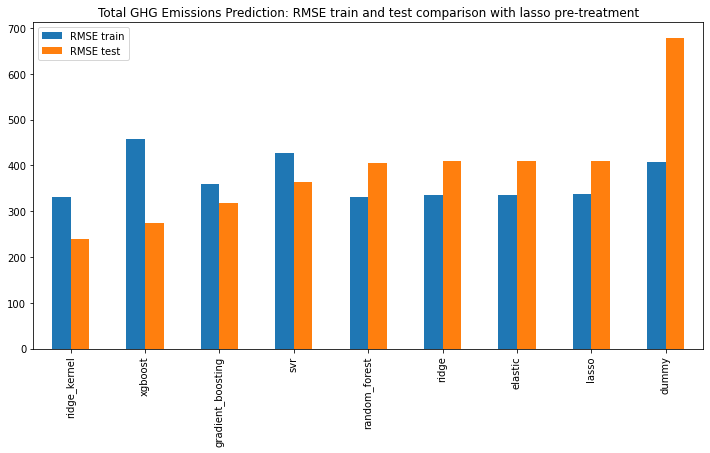

In [18]:
title = 'Total GHG Emissions Prediction: RMSE train and test comparison with lasso pre-treatment'
ax = ghg.iloc[[4, 5], :].T.plot.bar(figsize=(12, 6), title=title)
ax.legend(['RMSE train', 'RMSE test']);

**Energy Use**

In [88]:
# Stock all the models in a list
Cons_models = list([
    dum(),
    lin_reg(),
    lasso([1.0]),
    ela_net([5], [1.]),
    ridge([1e-4], ['saga']),
    svr([1.3], [0.0001]),
    ridge_kern([0.00005], [0.00005], ['rbf']),
    ran_for([130], [10], ['auto'], [1], [10]),
    grad_boo([90], [4], ['auto']),
    xg_boo([60], [3], [0.3], ['gbtree'])
])

result_cons_none = model_benchmark(x, y_Cons.add(1).apply(np.sqrt), None, Cons_models)

result_cons_none['perf'].round(2)

dummy is trained and fitted in 0.067 sec
{'mean_fit_time': array([0.0039603]), 'std_fit_time': array([0.00079116]), 'mean_score_time': array([0.00119488]), 'std_score_time': array([0.00039866]), 'param_dummy__strategy': masked_array(data=['mean'],
             mask=[False],
       fill_value='?',
            dtype=object), 'params': [{'dummy__strategy': 'mean'}], 'split0_test_score': array([-1635.26610646]), 'split1_test_score': array([-1399.95004916]), 'split2_test_score': array([-1363.78786252]), 'split3_test_score': array([-1945.60099622]), 'split4_test_score': array([-1363.29806851]), 'split5_test_score': array([-1477.74069722]), 'split6_test_score': array([-2234.14069658]), 'split7_test_score': array([-2004.29493199]), 'split8_test_score': array([-1525.4937022]), 'split9_test_score': array([-1147.06754592]), 'mean_test_score': array([-1609.66406568]), 'std_test_score': array([326.01056959]), 'rank_test_score': array([1])}
linear_regression is trained and fitted in 0.072 sec
{'mean

ridge_kernel is trained and fitted in 0.333 sec
{'mean_fit_time': array([0.02654488]), 'std_fit_time': array([0.0082417]), 'mean_score_time': array([0.00247157]), 'std_score_time': array([0.00460487]), 'param_ridge_kernel__alpha': masked_array(data=[5e-05],
             mask=[False],
       fill_value='?',
            dtype=object), 'param_ridge_kernel__gamma': masked_array(data=[5e-05],
             mask=[False],
       fill_value='?',
            dtype=object), 'param_ridge_kernel__kernel': masked_array(data=['rbf'],
             mask=[False],
       fill_value='?',
            dtype=object), 'params': [{'ridge_kernel__alpha': 5e-05, 'ridge_kernel__gamma': 5e-05, 'ridge_kernel__kernel': 'rbf'}], 'split0_test_score': array([-895.33765889]), 'split1_test_score': array([-800.18960339]), 'split2_test_score': array([-870.41660412]), 'split3_test_score': array([-780.12903186]), 'split4_test_score': array([-721.71145721]), 'split5_test_score': array([-813.07439519]), 'split6_test_score': ar

,xgboost,gradient_boosting,random_forest,ridge_kernel,svr,ridge,elastic,lasso,linear_regression,dummy
Train RMSE,865.53,855.83,880.51,865.25,888.77,888.70,885.92,887.76,2.756708e+14,1609.66
Test RMSE,805.87,799.14,837.55,807.33,830.76,829.03,829.06,829.81,8.323300e+02,1783.01
R²,0.80,0.80,0.78,0.80,0.78,0.78,0.78,0.78,7.800000e-01,-0.00
Time,0.38,1.97,4.93,0.33,3.84,0.78,0.13,0.22,7.000000e-02,0.07


In [20]:
# Stock all the models in a list
Cons_models_lasso = list([
    dum(),
    lin_reg(),
    lasso([1.0]),
    ela_net([5], [1.]),
    ridge([1e-4], ['saga']),
    svr([1.3], [0.0001]),
    ridge_kern([0.00005], [0.00005], ['rbf']),
    ran_for([130], [10], ['auto'], [1], [10]),
    grad_boo([90], [4], ['auto']),
    xg_boo([60], [3], [0.3], ['gbtree'])
])

result_cons_lasso = model_benchmark(x, y_Cons.add(1).apply(np.sqrt), 'lasso', Cons_models_lasso)

result_cons_lasso['perf'].round(2)

dummy is trained and fitted in 1.585 sec
linear_regression is trained and fitted in 1.487 sec
lasso is trained and fitted in 2.755 sec
elastic is trained and fitted in 2.766 sec
ridge is trained and fitted in 3.042 sec
svr is trained and fitted in 3.209 sec
ridge_kernel is trained and fitted in 2.363 sec
random_forest is trained and fitted in 4.762 sec
gradient_boosting is trained and fitted in 3.162 sec
xgboost is trained and fitted in 2.544 sec


,xgboost,gradient_boosting,random_forest,ridge_kernel,svr,ridge,elastic,lasso,linear_regression,dummy
Train RMSE,897.85,881.31,910.35,876.48,892.84,892.66,888.96,891.93,892.95,1619.60
Test RMSE,788.66,790.66,843.10,795.70,829.44,831.76,829.40,829.43,829.52,1783.01
R²,0.80,0.80,0.78,0.80,0.78,0.78,0.78,0.78,0.78,-0.00
Time,2.54,3.16,4.76,2.36,3.21,3.04,2.77,2.76,1.49,1.58


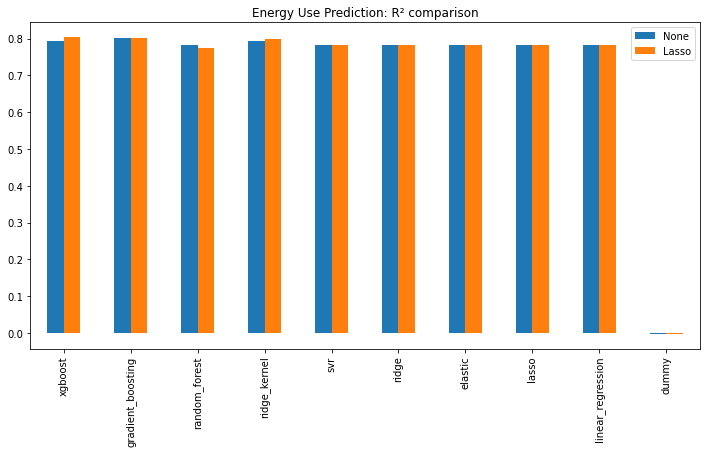

In [21]:
cons = pd.concat([
    result_cons_none['perf'],
    result_cons_lasso['perf']
])

title = 'Energy Use Prediction: R² comparison'
ax = cons.iloc[[2, 6], :].T.plot.bar(figsize=(12, 6), title=title)
ax.legend(['None', 'Lasso']);

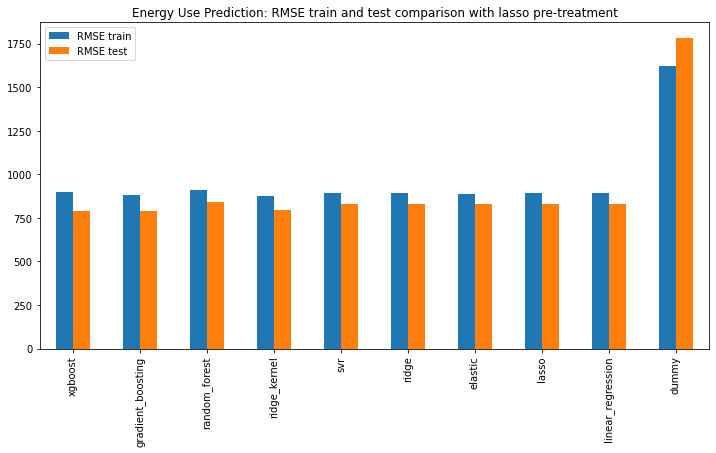

In [22]:
title = 'Energy Use Prediction: RMSE train and test comparison with lasso pre-treatment'
ax = cons.iloc[[4, 5], :].T.plot.bar(figsize=(12, 6), title=title)
ax.legend(['RMSE train', 'RMSE test']);

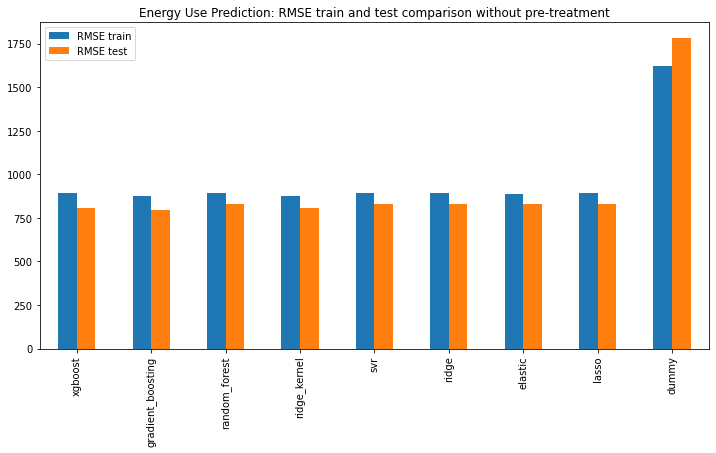

In [23]:
cons.drop(columns='linear_regression', inplace=True)

title = 'Energy Use Prediction: RMSE train and test comparison without pre-treatment'
ax = cons.iloc[[0, 1], :].T.plot.bar(figsize=(12, 6), title=title)
ax.legend(['RMSE train', 'RMSE test']);

**Best model and EnergyStar**

In [26]:
%store -r EnergySTAR

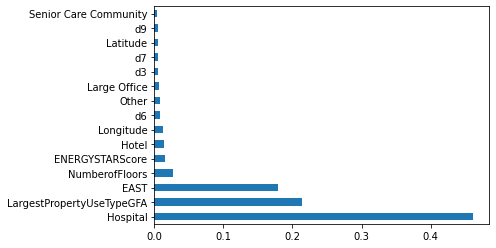

In [27]:
from sklearn.ensemble import ExtraTreesRegressor
import matplotlib.pyplot as plt

model = ExtraTreesRegressor()

df_energySTAR_GHG = pd.concat([x, EnergySTAR, y_GHG], axis=1).dropna()

model.fit(df_energySTAR_GHG.iloc[:, :-1], df_energySTAR_GHG.iloc[:, -1])

#plot graph of feature importances for better visualization
feat_GHG = pd.Series(model.feature_importances_, index=df_energySTAR_GHG.iloc[:, :-1].columns)
feat_GHG.nlargest(15).plot(kind='barh')
plt.show();

In [38]:
df_energySTAR_Cons

,NumberofFloors,LargestPropertyUseTypeGFA,Latitude,Longitude,NumberofBuildings,CouncilDistrictCode,College/University,Distribution Center,Distribution Center\r\n,Hospital,Hotel,K-12 School,Laboratory,Large Office,Low-Rise Multifamily,Medical Office,Mixed Use Property,Non-Refrigerated Warehouse,Other,Refrigerated Warehouse,Residence Hall/Dormitory,Restaurant,Restaurant\r\n,Retail Store,SPS-District K-12,Self-Storage Facility,Self-Storage Facility\r\n,Senior Care Community,Small- and Mid-Sized Office,Supermarket/Grocery Store,Worship Facility,d1,d2,d3,d4,d5,d6,d7,d8,d9,d10,d11,BALLARD,CENTRAL,DELRIDGE,DOWNTOWN,EAST,GREATER DUWAMISH,LAKE UNION,MAGNOLIA / QUEEN ANNE,NORTH,NORTHEAST,NORTHWEST,SOUTHEAST,SOUTHWEST,ENERGYSTARScore,SiteEnergyUse(kBtu)
0,3.464102,297.378547,6.900159,11.060651,1.0,7.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,65.0,2642.239391
1,3.316625,289.620441,6.900225,11.060441,1.0,7.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,51.0,2890.369527
2,6.403124,870.197104,6.900243,11.060637,1.0,7.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,18.0,8551.646450
3,3.162278,247.628754,6.900305,11.060588,1.0,7.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,5313.127234
4,4.242641,351.347406,6.900272,11.060783,1.0,7.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,67.0,3850.857047
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3271,1.414214,194.935887,6.900292,11.060136,1.0,3.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,67.0,1437.590345
3276,2.645751,437.416278,6.898515,11.060482,1.0,2.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,100.0,1772.376935
3309,2.828427,202.972905,6.904388,11.062852,1.0,6.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,64.0,2622.840445
3314,2.449490,653.590851,6.900967,11.060727,1.0,7.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,99.0,4090.327615


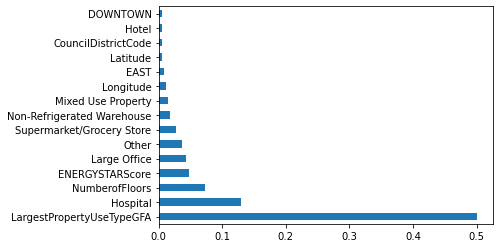

In [53]:
model = ExtraTreesRegressor()

df_energySTAR_Cons = pd.concat([x, EnergySTAR, y_Cons.add(1).apply(np.sqrt)], axis=1).dropna()

model.fit(df_energySTAR_Cons.iloc[:, :-1], df_energySTAR_Cons.iloc[:, -1])

#plot graph of feature importances for better visualization
feat_Cons = pd.Series(model.feature_importances_, index=df_energySTAR_Cons.iloc[:, :-1].columns)
feat_Cons.nlargest(15).plot(kind='barh')
plt.show();

In [46]:
# Stock the 3 best models in a list
models_to_bench = list([
    ridge_kern([0.001], [0.001], ['rbf'])
])

models_to_graph = {
    'ridge_kernel': 0,
}

ridge_kernel is trained and fitted in 0.107 sec


,ridge_kernel
Train RMSE,375.267000
Test RMSE,226.463000
R²,0.926000
Time,0.107118


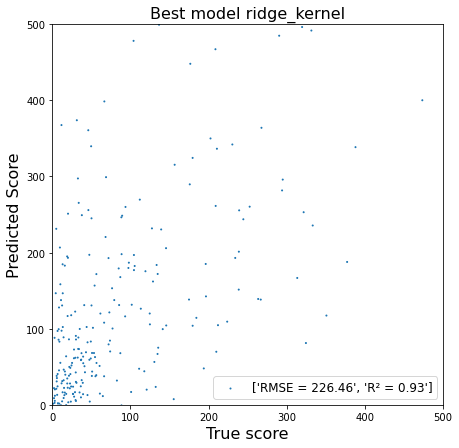

In [50]:
result1 = model_benchmark(df_energySTAR_GHG.iloc[:, :-1], df_energySTAR_GHG.iloc[:, -1], None, models_to_bench)
# Run all the models and store result

my_best_model = result1['perf'].T.sort_values(by='R²',
                                                 ascending=False).head(1)

display(result1['perf'])

for i in my_best_model.index:
    my_model = models_to_graph[i]

    model_name = i
    yt = result1['yt'][my_model][1]
    yp = result1['yp'][my_model][1]
    test_rmse = result1['perf'].iloc[1, my_model]
    r2 = result1['perf'].iloc[2, my_model]

    plot_yt_yp(model_name, yt, yp, test_rmse, r2, 500)

ridge_kernel is trained and fitted in 1.363 sec


,ridge_kernel
Train RMSE,800.43200
Test RMSE,618.11700
R²,0.88700
Time,1.36336


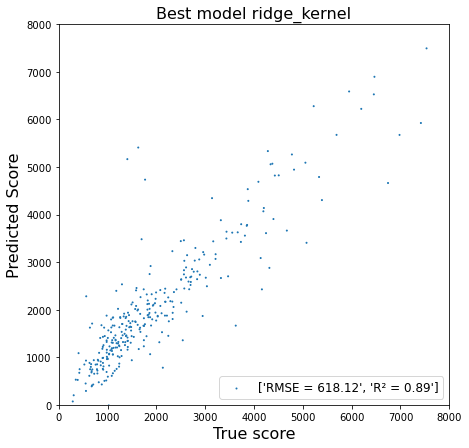

In [52]:
result2 = model_benchmark(df_energySTAR_Cons.iloc[:, :-1],
                          df_energySTAR_Cons.iloc[:, -1],
                          'lasso', models_to_bench)
# Run all the models and store result

my_best_model = result2['perf'].T.sort_values(by='R²', ascending=False).head(1)

display(result2['perf'])

for i in my_best_model.index:
    my_model = models_to_graph[i]

    model_name = i
    yt = result2['yt'][my_model][1]
    yp = result2['yp'][my_model][1]
    test_rmse = result2['perf'].iloc[1, my_model]
    r2 = result2['perf'].iloc[2, my_model]

    plot_yt_yp(model_name, yt, yp, test_rmse, r2, 8000)